<a href="https://colab.research.google.com/github/pa-pcosta/NYC-Airbnb-Analysis/blob/main/notebooks/NYC_Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Produto final**

Respostas para as perguntas que esse projeto buscava responder:

> ***a. Qual o valor médio do aluguel na cidade de Nova York?***
* U$152.76

> **_b. Quais os nomes das regiões que existem na cidade de Nova York?_**
* Bronx, Brooklyn, Manhattan, Queens e Staten Island

> **_c. Qual o valor do aluguel diário mais caro da cidade de Nova York?_**
* U$10,000.00

> **_d. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?_**
* Entire home/apt, Private room e  Shared room

> **_e. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?_**
* 37.457

> **_f. Como é a variação do preços dos imóveis em NY?_**
* Média = 152.76; Desvio Padrão = 240.17

> **_g. Existem mais imóveis baratos ou caros?_**
* Analisando o histograma podemos perceber que existem mais imóveis baratos do que caros. Percebe-se uma concentração de imóveis com preços de até U$200.00
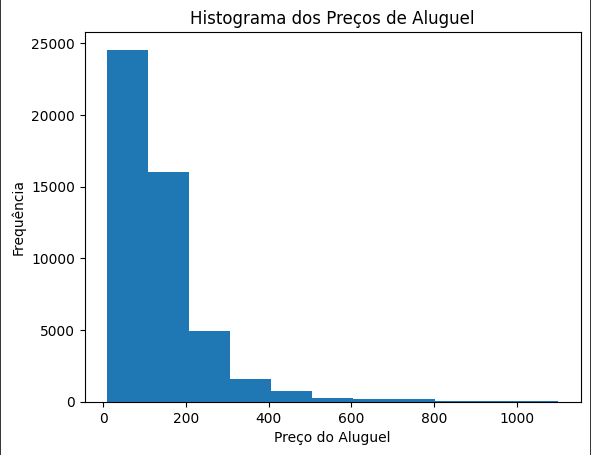

> **_h. Qual a distribuição do número de Reviews? Existem imóveis com muitos e outros com poucos reviews?_**
* Podemos perceber uma grande concentração de imóveis com poucos reviews. A grande maioria (pouco menos de 30.000 imóveis) possuem até 10 reviews. Já imóveis com até 20 reviews somam cerca de 5.000 unidades. Após isso a tendência diminui.    
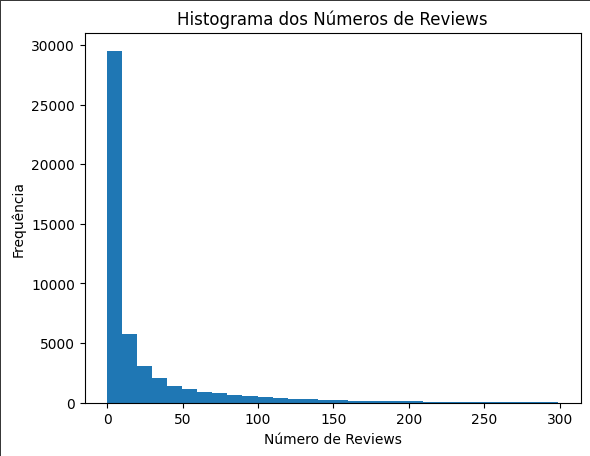

> **_i. Qual o valor do aluguel mais caro de cada região da cidade de Nova York?_**
* "Brooklyn, Manhattan e Queens possuem, simultaneamente, o preço de aluguel mais caro da cidade de NY de US 10.000. Seguidos de Staten Island, com um aluguel de US 5.000, e do Bronx, com um imóvel disponível por US 2.500."
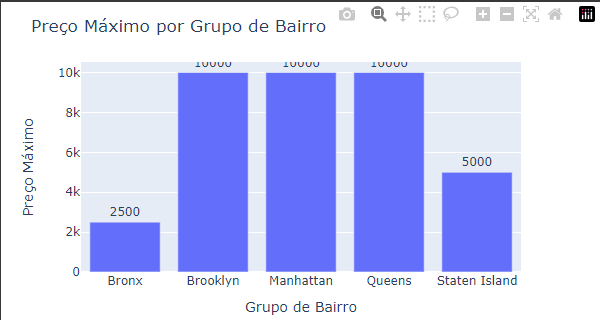

> **_j. Onde estão localizados os imóveis com aluguel mais caro de cada região?_**
* [Clique aqui para ver o mapa interativo](#scrollTo=tPwj4y30CQD3&).

> **_k. Conseguimos saber onde estão localizados os imóveis por seu tipo?_**
* [Clique aqui para ver o mapa interativo](#scrollTo=GHsQRPiATq-O&).

# **2. Planejamento e Execução:**

### Importar bibliotecas e arquivos necessários

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium as fl


url_data_set_alugueis_airbnb_nyc = "https://raw.githubusercontent.com/pa-pcosta/NYC-Airbnb-Analysis/main/dataset/AB_NYC_2019.csv";

data = pd.read_csv(url_data_set_alugueis_airbnb_nyc);

### a. Qual o valor médio do aluguel na cidade de Nova York?

In [ ]:
# Filtrar os preços diferentes de zero
precos_alugueis = data.loc[:, 'price']
precos_alugueis_filtrados = precos_alugueis[precos_alugueis != 0]

# Calcular a média dos preços filtrados
media_precos_alugueis = np.mean(precos_alugueis_filtrados)

# Exibir a média dos preços filtrados
print(f'Média = {media_precos_alugueis:.2f}')

Média = 152.76


### b. Quais os nomes das regiões que existem na cidade de Nova York?

In [ ]:
regioes = np.unique(data.loc[:, 'neighbourhood_group']);

print(regioes);

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


### c. Qual o valor do aluguel diário mais caro da cidade de Nova York?

In [ ]:
precos_alugueis = data.loc[:, 'price']
maior_aluguel = np.max(precos_alugueis);

print(maior_aluguel);

10000


### d. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?


In [ ]:
tipos_imoveis = np.unique(data.loc[:, 'room_type'])

print(tipos_imoveis)

['Entire home/apt' 'Private room' 'Shared room']


### e. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?


In [ ]:
anuncios_de_hosts = data.loc[:, 'host_id']

quantidade_hosts = len(np.unique(anuncios_de_hosts))

print(quantidade_hosts)

37457


### f. Como é a variação do preços dos imóveis em NY?

In [ ]:
# Filtrar os preços diferentes de zero
precos_alugueis = data.loc[:, 'price']
precos_alugueis_filtrados = precos_alugueis[precos_alugueis != 0]

# Calcular a média e o desvio padrão dos preços filtrados
media_precos_alugueis = np.mean(precos_alugueis_filtrados)
desvio_padrao_precos_alugueis = np.std(precos_alugueis_filtrados)

# Exibir a média e o desvio padrão dos preços filtrados
print(f'Média = {media_precos_alugueis:.2f}; Desvio Padrão = {desvio_padrao_precos_alugueis:.2f}')

Média = 152.76; Desvio Padrão = 240.17


### g. Existem mais imóveis baratos ou caros?

Text(0.5, 1.0, 'Histograma dos Preços de Aluguel')

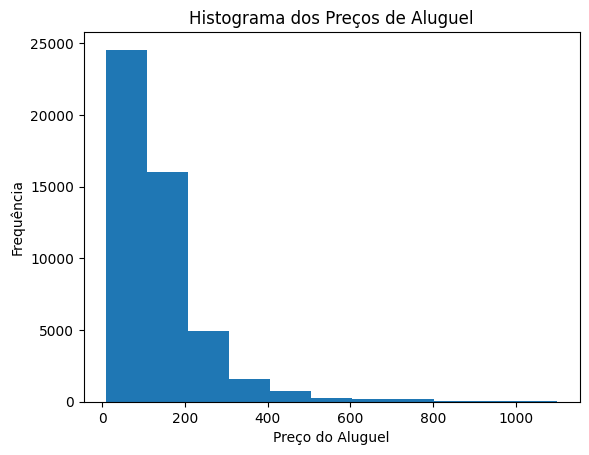

In [ ]:
# Definir o valor máximo do aluguel e a variação do aluguel a ser apresentado
valor_aluguel_maximo = 1100
variacao_aluguel_a_ser_apresentado = 100

# Filtrar as linhas do DataFrame com preços menores que o valor máximo do aluguel e diferentes de zero
linhas_abaixo_do_aluguel_maximo = (data.loc[:, 'price'] < valor_aluguel_maximo) & (data.loc[:, 'price'] != 0)

# Selecionar os preços filtrados
linhas_filtradas_para_histograma_precos = data.loc[linhas_abaixo_do_aluguel_maximo, 'price']

# Calcular o número de bins no histograma
numero_de_bins_no_histograma = int(valor_aluguel_maximo / variacao_aluguel_a_ser_apresentado)

# Plotar o histograma
plt.hist(linhas_filtradas_para_histograma_precos, bins=numero_de_bins_no_histograma);
plt.xlabel('Preço do Aluguel')
plt.ylabel('Frequência')
plt.title('Histograma dos Preços de Aluguel')

### h. Qual a distribuição do número de Reviews? Existem imóveis com muitos e outros com poucos reviews?

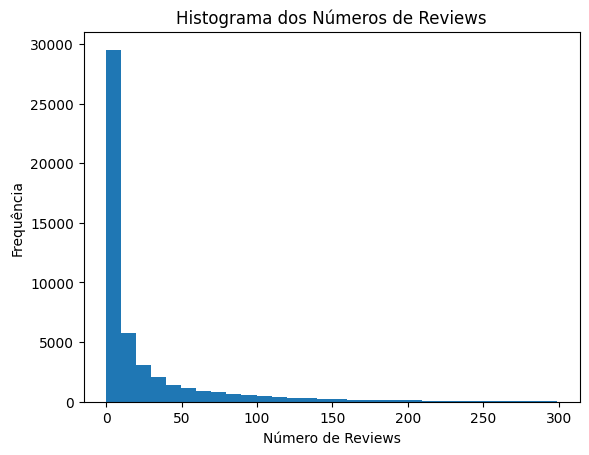

In [ ]:
# Definir a coluna de número de reviews e filtrar as linhas com menos de 300 reviews
coluna_numeros_de_reviews = 'number_of_reviews'
linhas = data.loc[:, coluna_numeros_de_reviews] < 300
reviews = data.loc[linhas, coluna_numeros_de_reviews]

# Plotar o histograma dos reviews filtrados
plt.hist(reviews, bins=30)
plt.xlabel('Número de Reviews')  # Nomear o eixo x
plt.ylabel('Frequência')         # Nomear o eixo y
plt.title('Histograma dos Números de Reviews')  # Nomear o histograma
plt.show()

### i. Qual o valor do aluguel mais caro de cada região da cidade de Nova York?

In [ ]:
# Selecionar as colunas de interesse e agrupar por 'neighbourhood_group', pegando o valor máximo de 'price' em cada grupo
colunas = ['price', 'neighbourhood_group']
data_plot = data.loc[:, colunas].groupby('neighbourhood_group').max().reset_index()

# Criar o gráfico de barras com Plotly Express
fig = px.bar(data_plot, x='neighbourhood_group', y='price',
             width=600, height=350)

# Nomear o gráfico e os eixos
fig.update_layout(title='Preço Máximo por Grupo de Bairro',
                  xaxis_title='Grupo de Bairro',
                  yaxis_title='Preço Máximo')

# Adicionar o preço exato em cima de cada barra
fig.update_traces(text=data_plot['price'], textposition='outside')

# Exibir o gráfico
fig.show()

### j. Onde estão localizados os imóveis com aluguel mais caro de cada região?

In [ ]:
# Definir as colunas que serão utilizadas nos dados
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']

# Definir a coluna para agrupamento
agrupamento = 'neighbourhood_group'

# Encontrar os índices dos imóveis com os preços mais altos em cada bairro
max_price_indices = data.groupby(agrupamento)['price'].idxmax()

# Selecionar os dados dos imóveis com os preços mais altos em cada bairro
data_plot = data.loc[max_price_indices, colunas]

# Criar um mapa utilizando a biblioteca Folium
map = fl.Map(
    location=[data_plot['latitude'].mean(), data_plot['longitude'].mean()],
    zoom_start=11,
    control_scale=True
)

# Adicionar um marcador para cada imóvel no mapa
for index, location_info in data_plot.iterrows():
    fl.Marker(
        # Definir a localização do marcador como a latitude e longitude do imóvel
        [location_info['latitude'], location_info['longitude']],
        # Definir o texto de popup do marcador como o nome do bairro
        popup=location_info['neighbourhood_group']
    ).add_to(map)

# Exibir o mapa
map

### k. Conseguimos saber onde estão localizados os imóveis por seu tipo?

In [ ]:
# conjunto de dados (filtragem linhas e colunas)
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = data.loc[:, colunas].sample(100)

# criar uma nova coluna chamada color
data_plot.loc[:, 'color'] = 'NA'

# definir cores baseado no tipo de quarto
linhas_private_room = data_plot.loc[:, 'room_type'] == 'Private room'
linhas_entire_home = data_plot.loc[:, 'room_type'] == 'Entire home/apt'
linhas_shared_room = data_plot.loc[:, 'room_type'] == 'Shared room'

data_plot.loc[linhas_private_room, 'color'] = 'darkgreen'
data_plot.loc[linhas_entire_home, 'color'] = 'darkred'
data_plot.loc[linhas_shared_room, 'color'] = 'purple'


# Imprimir a legenda
print("Legenda:")
print("  - Dark Green: Private room")
print("  - Dark Red: Entire home/apt")
print("  - Purple: Shared room")

# desenhar mapa

map = fl.Map(
    location = [data_plot.loc[:, 'latitude'].mean(),
                data_plot.loc[:, 'longitude'].mean()],
    zoom_start = 11
    )

for index, location_info in data_plot.iterrows():
  fl.Marker(
      [location_info['latitude'], location_info['longitude']],
      popup = [ location_info['neighbourhood_group'], location_info['room_type'] ],
      icon = fl.Icon( color=location_info['color'])
      ).add_to(map)

map

Legenda:
  - Dark Green: Private room
  - Dark Red: Entire home/apt
  - Purple: Shared room
